Lance Uy - 1006123570

# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC`

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

*Ahem...*

- Is it eating you up inside that you don't know what HMC actualy is?
- Do you hate just using something without knowing what it is?<br>Or what you're even doing when you use it?

*Well then, my friends, have I got the cure for you!*<br>All **you** must **do** is listen **to** someone **who** will re**view** for **you** the next slides **few**!



Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

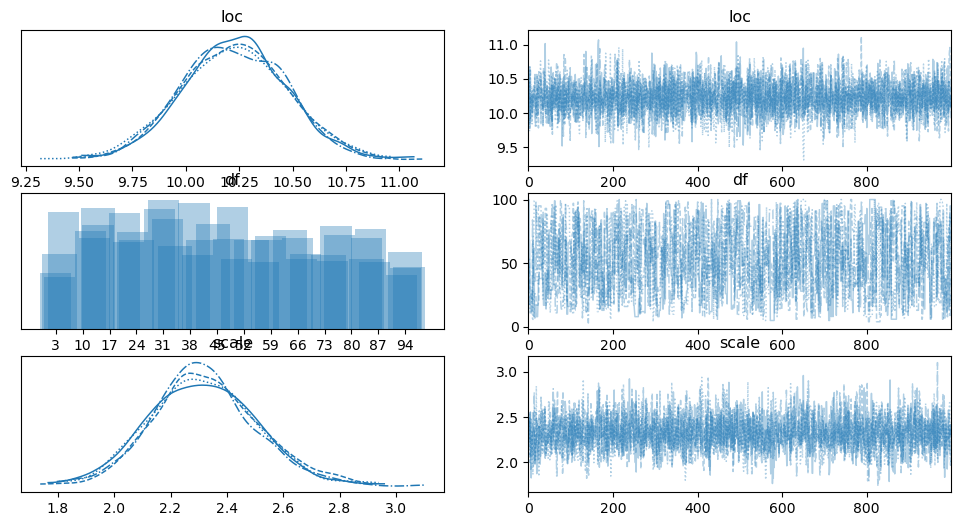

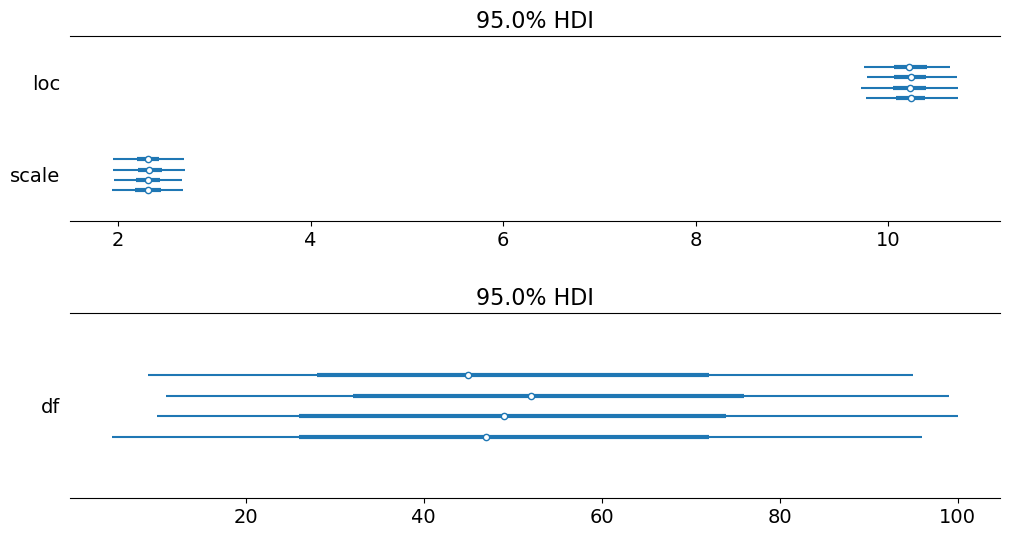

In [6]:
from scipy import stats;
import numpy as np;
import matplotlib.pyplot as plt
import pymc as pm;
import arviz as az

# Use sample size of 100 initially
n, loc_true, scale_true, df_true = 100, 10, 2, 15
x = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

tnorm_halfnorm_discrete_uniform = pm.Model()
with tnorm_halfnorm_discrete_uniform:
  loc = pm.Normal("loc", mu=0, sigma=10)
  scale = pm.HalfNormal("scale", sigma=5)
  df = pm.DiscreteUniform("df", lower=1, upper=100)
  x_obs = pm.StudentT("likelihood", mu=loc, sigma=scale, nu=df, observed=x)

with tnorm_halfnorm_discrete_uniform:
  idata_HMC=pm.sample()

# Plots
az.plot_trace(idata_HMC)

# Confidence intervals
fig,ax = plt.subplots(2,1,figsize =(12,6))
plt.subplots_adjust(hspace=0.5)
az.plot_forest(idata_HMC, var_names=["loc", "scale"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata_HMC, var_names=["df"], combined=False, hdi_prob=0.95, ax=ax[1])

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/opt/conda/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this wa

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

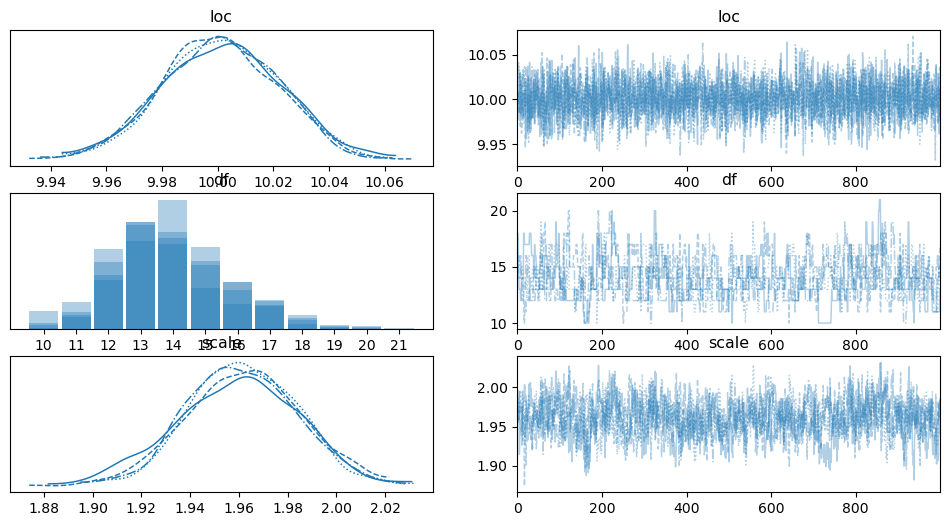

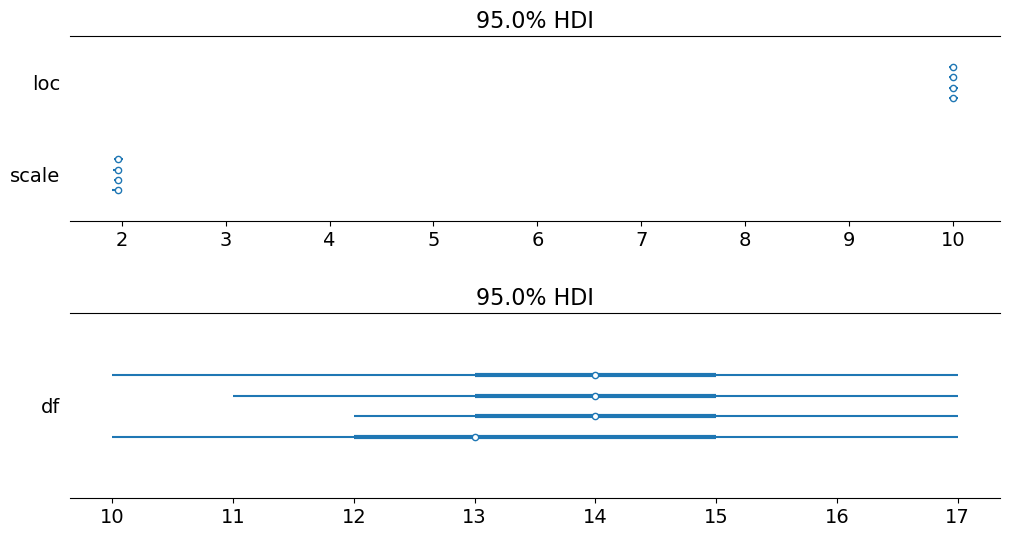

In [5]:
# Use larger sample size of 10000
n, loc_true, scale_true, df_true = 10000, 10, 2, 15
x = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

tnorm_halfnorm_discrete_uniform_2 = pm.Model()
with tnorm_halfnorm_discrete_uniform_2:
  loc = pm.Normal("loc", mu=0, sigma=10)
  scale = pm.HalfNormal("scale", sigma=5)
  df = pm.DiscreteUniform("df", lower=1, upper=100)
  x_obs = pm.StudentT("likelihood", mu=loc, sigma=scale, nu=df, observed=x)

with tnorm_halfnorm_discrete_uniform_2:
  idata_HMC_2=pm.sample()

# Plots
az.plot_trace(idata_HMC_2)

# Summary Data
az.summary(idata_HMC_2, round_to=2)

# Confidence intervals

fig,ax = plt.subplots(2,1,figsize =(12,6))
plt.subplots_adjust(hspace=0.5)
az.plot_forest(idata_HMC_2, var_names=["loc", "scale"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata_HMC_2, var_names=["df"], combined=False, hdi_prob=0.95, ax=ax[1])

In [9]:
# Summary Data for n=100
az.summary(idata_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.53,0.21,10.16,10.92,0.00,0.00,1954.42,1308.27,1.01
df,36.63,22.57,5.00,84.00,7.92,5.82,9.92,79.22,1.40
scale,2.04,0.17,1.73,2.35,0.01,0.01,450.60,441.64,1.01


In [8]:
# Summary Data for n=10000
az.summary(idata_HMC_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,9.99,0.02,9.95,10.03,0.00,0.0,1745.78,1467.89,1.00
df,12.99,1.50,10.00,15.00,0.14,0.1,118.60,82.81,1.02
scale,2.00,0.02,1.95,2.04,0.00,0.0,202.87,381.09,1.01


Initially, with a sample size of 100, our inference for the degrees of freedom parameter was imprecise, showing a wide 94% credible interval from [5, 84]. Surprisingly, increasing the sample size to 10,000 significantly improved accuracy, narrowing the interval to [10, 15], closely aligning with the true value of 15 (from df_true variable). This result suggests that the larger dataset provided more detailed information, leading to a more accurate representation of the true parameter values in the posterior distribution, despite a reduction in effective sample size.

# Homework #4 Part II: HMC Diagnostics

- Return to your posterior analysis in "Homework #4 Part I" and
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC`

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example*
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?




# Effective Sample Sizes

In [10]:
# Summary Data for n=100
az.summary(idata_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.53,0.21,10.16,10.92,0.00,0.00,1954.42,1308.27,1.01
df,36.63,22.57,5.00,84.00,7.92,5.82,9.92,79.22,1.40
scale,2.04,0.17,1.73,2.35,0.01,0.01,450.60,441.64,1.01


In [11]:
# Summary Data for n=10000
az.summary(idata_HMC_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,9.99,0.02,9.95,10.03,0.00,0.0,1745.78,1467.89,1.00
df,12.99,1.50,10.00,15.00,0.14,0.1,118.60,82.81,1.02
scale,2.00,0.02,1.95,2.04,0.00,0.0,202.87,381.09,1.01


We can see that the R-Hat statistic for df is significantly greater than 1 for the small sample size compared to larger sample size - 1.40 vs 1.02

# Chain Convergence Measures

In [12]:
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()})
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC_2).items()})

HMC Split-Rhats {'loc': 1.0054, 'df': 1.4034, 'scale': 1.0074}
HMC Split-Rhats {'loc': 1.0021, 'df': 1.0153, 'scale': 1.0082}


# Divergences

In [16]:
idata_HMC.sample_stats["diverging"].sum()

<xarray.DataArray 'diverging' ()>
array(0)

In [17]:
idata_HMC_2.sample_stats["diverging"].sum()

<xarray.DataArray 'diverging' ()>
array(0)

There are 0 divergences in both models since both arrays are empty

# Acceptance Rates

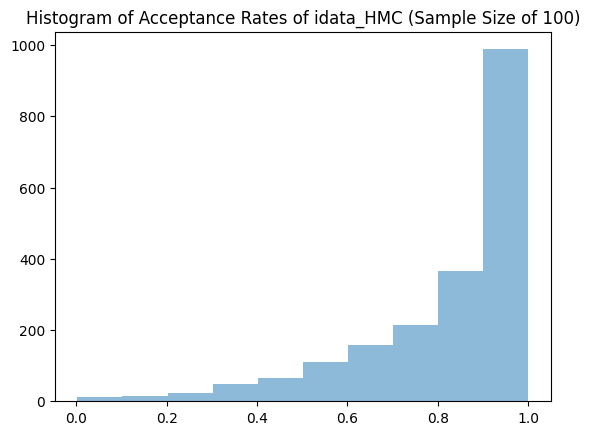

In [18]:
plt.hist(idata_HMC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,);
plt.title('Histogram of Acceptance Rates of idata_HMC (Sample Size of 100)');

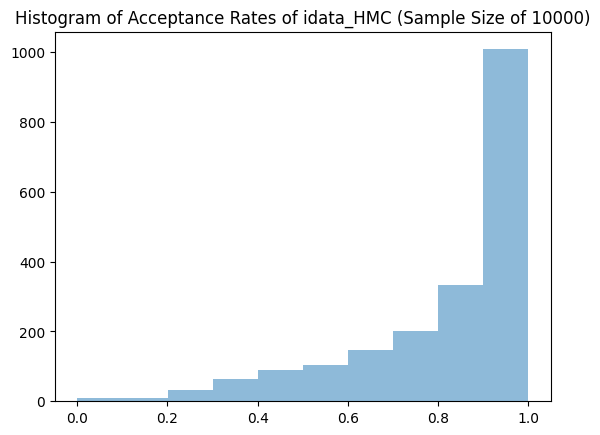

In [19]:
plt.hist(idata_HMC_2.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,);
plt.title('Histogram of Acceptance Rates of idata_HMC (Sample Size of 10000)');

Both models have high acceptance rates which are close to 1

# Eight Schools

In [1]:
import numpy as np
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

import pymc as pm

with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [2]:
# This posterior distribution implied by this specification can be sampled from
# using HMC where the necessary auxiliary variables are added "under the hood"
SEED = [12345, 54321] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [3]:
# As is seen above, there are many divergences because the specification above
# induces high curature in the energy, but the following alternative
# parameterization alleviates this problem.

with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations
    # below so the energy still has high curvature with respect to tau; but,
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})
# Now very few divergences... problem solved!

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


# Effective Sample Sizes for Both Centered and Non-Centered

In [29]:
import pandas as pd
print("Effective Sample Sizes (function of Markov Chain autocorrelation dependency)")
pd.concat(
[pd.DataFrame({'Centered': pm.summary(fit_C)[:1]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][:1]}),
 pd.DataFrame({'Centered': pm.summary(fit_C)[1:]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][9:]})])

Effective Sample Sizes (function of Markov Chain autocorrelation dependency)


,Centered,Non-Centered
mu,1403.0,10339.0
tau,129.0,5881.0
theta[0],2190.0,9611.0
theta[1],2208.0,11257.0
theta[2],2065.0,10718.0
theta[3],2094.0,11490.0
theta[4],2156.0,10942.0
theta[5],2547.0,10605.0
theta[6],1952.0,10444.0
theta[7],2337.0,10797.0


# Chain Convergence Measures for Both Centered and Non-Centered

In [30]:
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(fit_C).items()})
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(fit_NC).items()})

HMC Split-Rhats {'mu': 1.0038, 'theta': array([1.0062, 1.0026, 1.0024, 1.0027, 1.0034, 1.0021, 1.0091, 1.003 ]), 'tau': 1.0077}
HMC Split-Rhats {'mu': 1.0004, 'theta_t': array([0.9999, 0.9999, 1.    , 1.0002, 1.    , 1.0002, 1.0004, 1.0009]), 'tau': 1.0006, 'theta': array([1.0002, 1.0002, 1.0009, 1.0001, 0.9999, 1.0004, 0.9999, 1.0006])}


# Divergences for Both Centered and Non-Centered

In [31]:
fit_C.sample_stats["diverging"].sum()

<xarray.DataArray 'diverging' ()>
array(331)

In [32]:
fit_NC.sample_stats["diverging"].sum()

<xarray.DataArray 'diverging' ()>
array(22)

There are 331 divergences in the centered model whereas we only have 22 divergences in the non-centered model.

# Acceptance Rates for Both Centered and Non-Centered

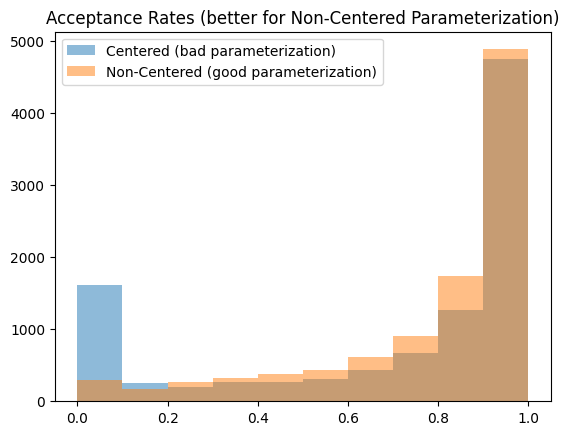

In [33]:
import matplotlib.pyplot as plt
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered (bad parameterization)');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered (good parameterization)');
plt.title('Acceptance Rates (better for Non-Centered Parameterization)'); plt.legend();

In [35]:
print("Mean Acceptance Rate for Centered Model:", round(np.mean(fit_C.sample_stats.acceptance_rate.values.flatten()),2))
print("Mean Acceptance Rate for Non-Centered Model:", round(np.mean(fit_NC.sample_stats.acceptance_rate.values.flatten()),2))

Mean Acceptance Rate for centered model: 0.69
Mean Acceptance Rate for non-centered model: 0.79


# Analysis

The non-centered model demonstrated superior performance in exploring the posterior distribution, with higher effective sample sizes for its parameters. In contrast, the centered model took smaller steps during exploration and experienced significantly more divergences (331) compared to the non-centered model (22). Convergence metrics favored the non-centered model, as evidenced by all values being closer to 1.0. The mean acceptance rate was more desirable for the non-centered model (79%) compared to the centered model (69%).

The challenges with the centered model stemmed from excessive curvature in the energy function, causing small steps to yield almost zero density and resulting in frequent divergence and inefficient sampling. In contrast, the non-centered approach mitigated these issues by introducing an intermediary step in calculations, smoothing out abrupt changes in the energy function. This smoothing enhanced the efficiency of Hamiltonian Monte Carlo (HMC) in exploring diverse possibilities, preventing it from getting stuck.

In line with PyMC recommendations, it's advisable to run at least 4 chains for a robust computation of convergence diagnostics, ensuring more reliable results in Bayesian model inference.

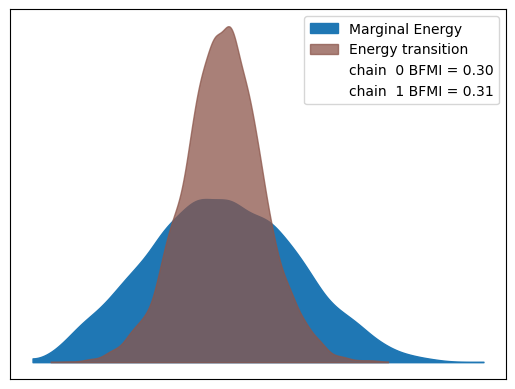

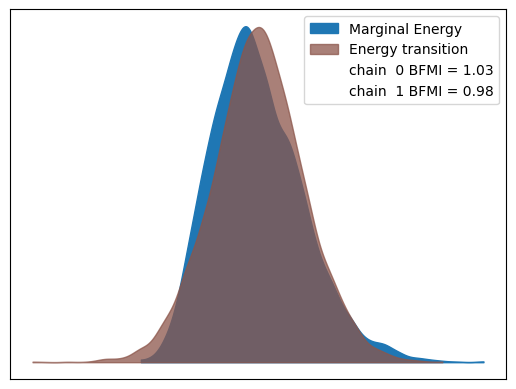

In [7]:
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

In the first plot, representing the centered model, it is evident that the algorithm struggled to adequately explore the posterior distribution. This is evident in the discrepancy between the marginal energy and energy transition curves. The high curvature of the energy function in the centered model posed a challenge for the Hamiltonian Monte Carlo (HMC) algorithm, hindering efficient exploration of the posterior distribution. Conversely, in the second plot depicting the non-centered model, the alignment of the two curves indicates successful exploration. This alignment suggests that the non-centering approach effectively reduced the curvature of the energy function, providing confidence in the thorough exploration of the posterior distribution by the non-centered model.